In [1]:
#Plots are created to evaluate the performance of the LSH. First the old data cleaning (imported as old clean) method is used, and the binary vectors
#as in MSMP+ are used to compute F1, PC and PQ. 

from data_cleaning import clean_tv_data as old_clean
from binary_vectors import *
from minhashing import *
from lsh import *
from true_pairs import *
#from plotting import *
from msm import *
from distance_matrix import *
from f1_scores import *
from utilities import *
import itertools

input_file_path = "TVs-all-merged.json"
output_file_path_old = "TVs-all-merged-cleaned_old.json"
old_clean(input_file_path, output_file_path_old)

with open(output_file_path_old, 'r') as file: 
    data_cleaned_old = json.load(file)

all_products = [item for model_id, items in data_cleaned_old.items() for item in items]
all_pairs = list(itertools.combinations(range(len(all_products)), 2))
all_true_pairs = find_set_duplicates(all_products)

pairs, true_pairs, signature_matrix, n = get_signature_matrix(all_products)

from lsh import *
import matplotlib.pyplot as plt
import numpy as np

num_rows_sig, num_cols_sig = signature_matrix.shape
total_comparisons = (num_cols_sig*(num_cols_sig-1))/2 
n = signature_matrix.shape[0]
D_n = len(true_pairs)

PQ_values_old = []
PC_values_old = []
F1_values_old = []

fraction_of_comparisons_values = []

for b in range(1, n): #    
    if n % b != 0:  # Check if n is divisible by b
        continue  # Skip this b if n is not divisible by b

    r = n // b  # Use integer division to determine r
    
    candidate_pairs = lsh(signature_matrix, b, r)

    N_c = len(candidate_pairs)
    D_f = len(candidate_pairs.intersection(true_pairs))

    PQ = D_f / N_c
    PC = D_f / D_n
    F_1 = (2 * (PQ * PC)) / (PQ + PC)
    fraction_of_comparisons = N_c / total_comparisons

    PQ_values_old.append(PQ)
    PC_values_old.append(PC)
    F1_values_old.append(F_1)
    fraction_of_comparisons_values.append(fraction_of_comparisons)

#Plot old and new PC, PQ, and F1 against the fraction of comparisons.     
# Convert lists to numpy arrays for plotting
PQ_values_old = np.array(PQ_values_old)
PC_values_old = np.array(PC_values_old)
F1_values_old = np.array(F1_values_old)
fraction_of_comparisons_values = np.array(fraction_of_comparisons_values)


Length binary matrix is: 1295


In [2]:
#The improved data cleaning (imported as improved_clean) method is used, and the improved binary vectors (including brand names) are obtained. 
#this is imported as improved_binary_matrix

from data_cleaning_improved import clean_tv_data as improved_clean
from binary_vectors_improved import obtain_binary_matrix as improved_binary_matrix
from minhashing import *
from lsh import *
from true_pairs import *
#from plotting import *
from msm import *
from distance_matrix import *
from f1_scores import *
from utilities import *
import itertools

input_file_path = "TVs-all-merged.json"
output_file_path_improved = "TVs-all-merged-cleaned_improved.json"
improved_clean(input_file_path, output_file_path_improved)


with open(output_file_path_improved, 'r') as file: 
    data_cleaned_improved = json.load(file)

all_products = [item for model_id, items in data_cleaned_improved.items() for item in items]
all_pairs = list(itertools.combinations(range(len(all_products)), 2))
all_true_pairs = find_set_duplicates(all_products)


pairs = list(itertools.combinations(range(len(all_products)), 2))
true_pairs = find_set_duplicates(all_products)
binary_matrix = improved_binary_matrix(all_products)
signature_matrix = minhash(binary_matrix)
rows, cols = signature_matrix.shape
n = rows

from lsh import *
import matplotlib.pyplot as plt
import numpy as np

num_rows_sig, num_cols_sig = signature_matrix.shape
total_comparisons = (num_cols_sig*(num_cols_sig-1))/2 
n = signature_matrix.shape[0]
D_n = len(true_pairs)

PQ_values_new = []
PC_values_new= []
F1_values_new = []

fraction_of_comparisons_values = []

for b in range(1, n): 
    if n % b != 0:  # Check if n is divisible by b
        continue  # Skip this b if n is not divisible by b

    r = n // b  # Use integer division to determine r
    
    candidate_pairs = lsh(signature_matrix, b, r)

    N_c = len(candidate_pairs)
    D_f = len(candidate_pairs.intersection(true_pairs))

    PQ = D_f / N_c
    PC = D_f / D_n
    F_1 = (2 * (PQ * PC)) / (PQ + PC)
    fraction_of_comparisons = N_c / total_comparisons


    PQ_values_new.append(PQ)
    PC_values_new.append(PC)
    F1_values_new.append(F_1)
    fraction_of_comparisons_values.append(fraction_of_comparisons)

#Plot old and new PC, PQ, and F1 against the fraction of comparisons.     
# Convert lists to numpy arrays for plotting
PQ_values_new = np.array(PQ_values_new)
PC_values_new = np.array(PC_values_new)
F1_values_new = np.array(F1_values_new) 
fraction_of_comparisons_values = np.array(fraction_of_comparisons_values)


Length binary matrix is: 1336


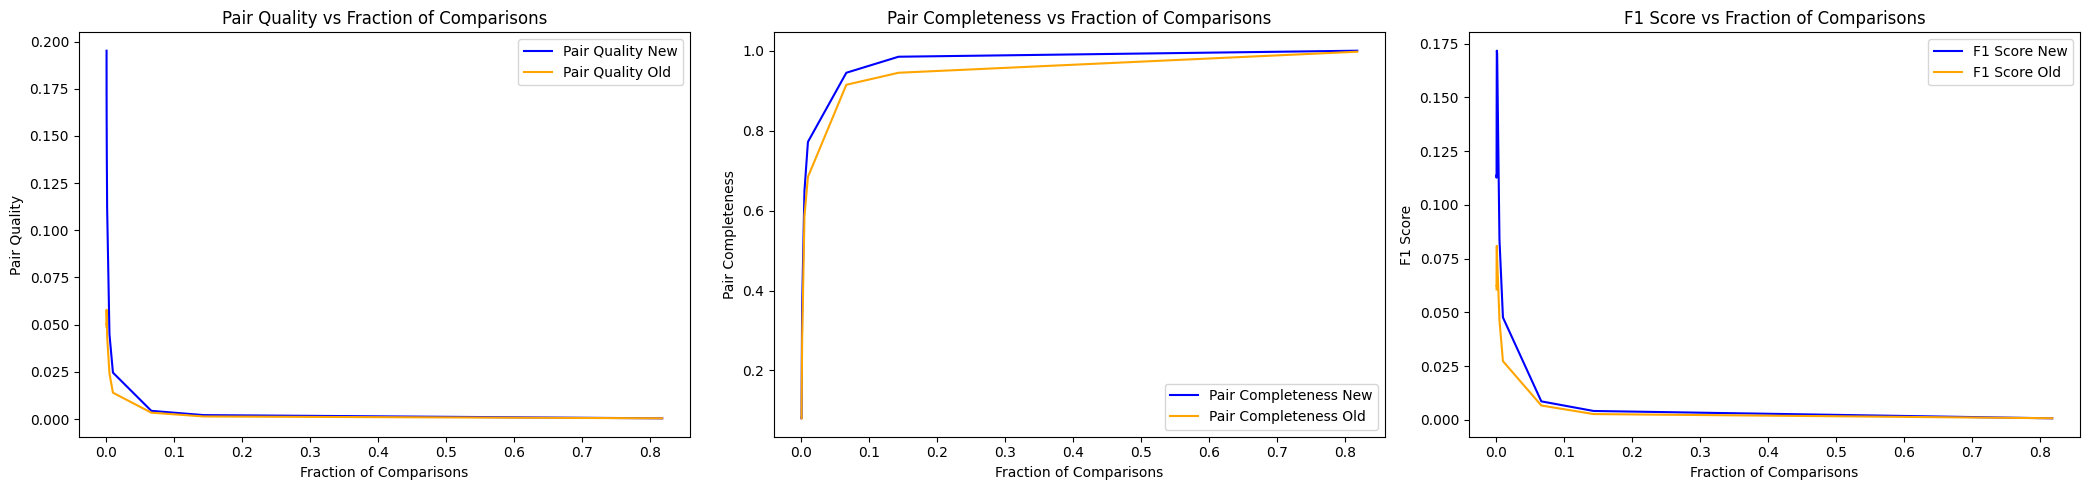

In [3]:
#Plots are created for the F1, PC, and PQ value against the fraction of comparisons. Each plot contains the values of the old, en the new approach. 
import matplotlib.pyplot as plt

# Create a figure with a 1x3 grid of subplots
plt.figure(figsize=(21, 5))  # Adjusted figure size to accommodate three plots

# Pair Quality plot
plt.subplot(1, 3, 1)  # First subplot in a 1x3 grid
plt.plot(fraction_of_comparisons_values, PQ_values_new, color='blue', label='Pair Quality New')
plt.plot(fraction_of_comparisons_values, PQ_values_old, color='orange', label='Pair Quality Old')
plt.xlabel('Fraction of Comparisons')
plt.ylabel('Pair Quality')
plt.title('Pair Quality vs Fraction of Comparisons')
plt.legend()

# Pair Completeness plot
plt.subplot(1, 3, 2)  # Second subplot in a 1x3 grid
plt.plot(fraction_of_comparisons_values, PC_values_new, color='blue', label='Pair Completeness New')
plt.plot(fraction_of_comparisons_values, PC_values_old, color='orange', label='Pair Completeness Old')
plt.xlabel('Fraction of Comparisons')
plt.ylabel('Pair Completeness')
plt.title('Pair Completeness vs Fraction of Comparisons')
plt.legend()

# F1 Values plot
plt.subplot(1, 3, 3)  # Third subplot in a 1x3 grid
plt.plot(fraction_of_comparisons_values, F1_values_new, color='blue', label='F1 Score New')
plt.plot(fraction_of_comparisons_values, F1_values_old, color='orange', label='F1 Score Old')
plt.xlabel('Fraction of Comparisons')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Fraction of Comparisons')
plt.legend()

plt.tight_layout()
plt.savefig("LSH.png")


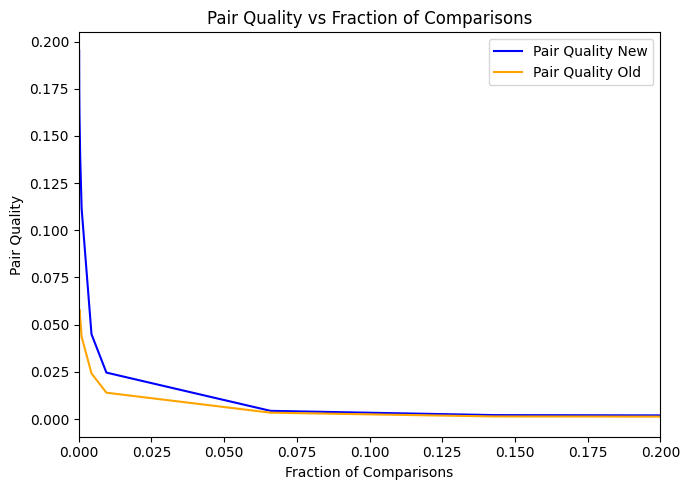

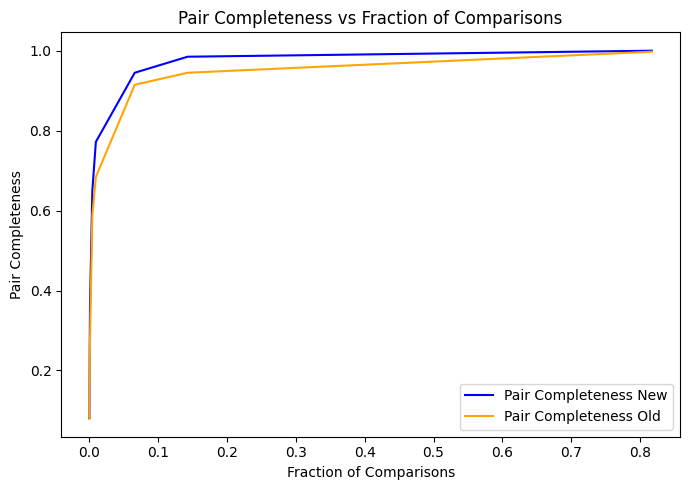

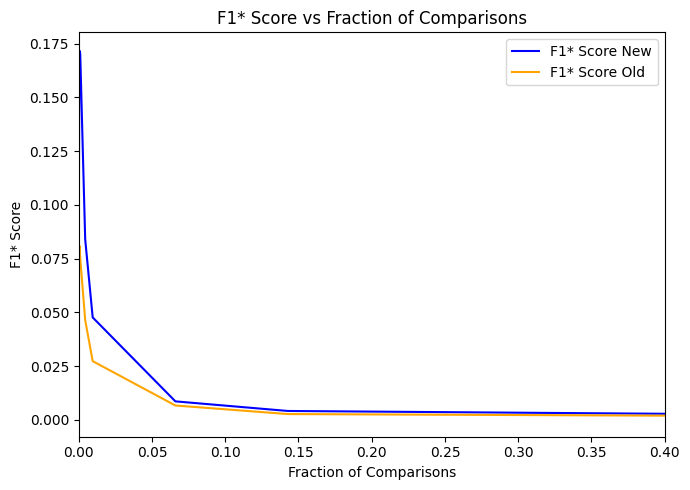

In [13]:
import matplotlib.pyplot as plt

# Pair Quality plot
plt.figure(figsize=(7, 5))  # Size for individual plot
plt.plot(fraction_of_comparisons_values, PQ_values_new, color='blue', label='Pair Quality New')
plt.plot(fraction_of_comparisons_values, PQ_values_old, color='orange', label='Pair Quality Old')
plt.xlim(0, 0.2) 
plt.xlabel('Fraction of Comparisons')
plt.ylabel('Pair Quality')
plt.title('Pair Quality vs Fraction of Comparisons')
plt.legend()
plt.tight_layout()
plt.savefig("Pair_Quality.png")  # Save the Pair Quality plot

# Pair Completeness plot
plt.figure(figsize=(7, 5))  # Size for individual plot
plt.plot(fraction_of_comparisons_values, PC_values_new, color='blue', label='Pair Completeness New')
plt.plot(fraction_of_comparisons_values, PC_values_old, color='orange', label='Pair Completeness Old')
plt.xlabel('Fraction of Comparisons')
plt.ylabel('Pair Completeness')
plt.title('Pair Completeness vs Fraction of Comparisons')
plt.legend()
plt.tight_layout()
plt.savefig("Pair_Completeness.png")  # Save the Pair Completeness plot

# F1 Values plot
plt.figure(figsize=(7, 5))  # Size for individual plot
plt.plot(fraction_of_comparisons_values, F1_values_new, color='blue', label='F1* Score New')
plt.plot(fraction_of_comparisons_values, F1_values_old, color='orange', label='F1* Score Old')
plt.xlim(0, 0.4) 
plt.xlabel('Fraction of Comparisons')
plt.ylabel('F1* Score')
plt.title('F1* Score vs Fraction of Comparisons')
plt.legend()
plt.tight_layout()
plt.savefig("F1_Score.png")  # Save the F1 Score plot
